In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

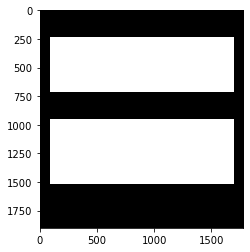

In [5]:
img = np.zeros((200,200),np.uint8)
img[25:75,10:190] = 255
img[100:160,10:190] = 255
img = cv2.resize(img,(0,0), fx=1780/200, fy=1900/200, interpolation = cv2.INTER_AREA)
img[img>0] = 1
plt.imshow(img,'gray')